In [1]:
cd ~/Dropbox/project_4

/Users/nbeshouri/Documents/Projects/Metis/Project 4


In [2]:
star_wars = [
    'C-3PO', 
    'R2-D2', 
    'Jar Jar Binks', 
    'Luke Skywalker',
    'Jabba the Hutt',
    'Han Solo',
    'Darth Vader',
    'Palpatine',
    'Obi-Wan Kenobi',
    'Yoda',
    'Princess Leia'
]

harry_potter = [
    'Harry Potter (character)',
    'Hermione Granger', 
    'Ron Weasley', 
    'Albus Dumbledore', 
    'Lord Voldemort',
    'Severus Snape',
    'Draco Malfoy'
]

futurama = [
    'Philip J. Fry',
    'Leela (Futurama)',
    'Bender (Futurama)',
    'Professor Farnsworth',
    'Zoidberg',
]


avatar = [
    'Aang',
    'Katara (Avatar: The Last Airbender)',
    'Zuko',
    'Korra',
    'Iroh',
    'Sokka'
]


other = [
    'Jean-Luc Picard', 
    'Eric Cartman',
    'Bart Simpson',
    'Gandalf',
    'Sherlock Holmes',
    'Achilles',
    'Batman',
    'Shawn Spencer',
    'Buffy Summers',
    'Spike (Buffy the Vampire Slayer)',
    'Goku',
    'Edward Elric',
    'Alphonse Elric',
    'Willow Rosenberg',
    'Frodo Baggins',
    'Gollum',
    'Rick Sanchez (Rick and Morty)'
#     'Darth Maul'

]

coi = star_wars + harry_potter + futurama + avatar + other


In [3]:
from hwmf import utils, data, models, transforms
import numpy as np
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from cycler import cycler
import matplotlib
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import re

In [4]:
def get_name_to_vec(model):
    name_to_vec = {}
    for name in model.docvecs.doctags.keys():
        name_to_vec[name] = model.docvecs[name]
    return name_to_vec

def get_X_y(model):
    name_to_vec = get_name_to_vec(model)
#     name_to_vec = transforms.filter_titles(name_to_vec)
    y, X =  tuple(map(np.array, zip(*name_to_vec.items())))
    X = StandardScaler().fit_transform(X)
    return X, y

def get_closest_to_center(cluster_centers, points, y, num=5):
    names = []
    for center in cluster_centers:
        diffs = points - center
        distances = np.linalg.norm(diffs, axis=1)
        np.argsort(distances)
        names.append(y[np.argsort(distances)][:num])
    return names

def show_clusters(target_names, all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    s.sort_index(inplace=True)
    return s[s.index.isin(target_names)]

def sample_clusters(all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    for cluster in np.unique(cluster_labels):
        print('Cluster', cluster)
        print(s[s == cluster].sample(20))
        print()


In [79]:
sample_clusters(y, cluster_labels)

Cluster 0
Rachel Bailey                       0
Ailsa Stewart                       0
Hilda Ogden                         0
Nigel Bates                         0
Vanessa Gold                        0
Joe McIntyre (Coronation Street)    0
Ivy the Terrible                    0
Katie Rogers                        0
Joannie Taylor                      0
Dale Smith (The Bill)               0
Grace Blood                         0
Syd Woolfe                          0
Julie Haye                          0
Jambo Bolton                        0
Mavis Wilton                        0
Poppy Meadow                        0
Janine LaCroix                      0
Minty Peterson                      0
Pearl Ladderbanks                   0
Lily Hassan                         0
dtype: int32

Cluster 1
Zaran                                          1
Painter (comics)                               1
Zodiac (comics)                                1
Namora                                         1
Mathemanic

In [41]:
model = utils.load_data('long_run_on_raw.pickle')

In [ ]:
model = utils.load_data('long_run_on_raw.pickle')

In [ ]:
model = utils.load_data('okay_model.pickle')

In [42]:
name_to_vec = get_name_to_vec(model)
X, y = get_X_y(model)

In [256]:
# pca = PCA(n_components=10)
# X = pca.fit_transform(X)

In [53]:
kmeans_model = cluster.KMeans(n_clusters=10, max_iter=5000)
cluster_labels = kmeans_model.fit_predict(X)

In [46]:
# Assigns all to -1
dbscan = cluster.DBSCAN()
cluster_labels = dbscan.fit_predict(X)

In [49]:
# Assigns all to 0
mshift = cluster.MeanShift(n_jobs=10)
cluster_labels = mshift.fit_predict(X)

In [52]:
# Took too long
spectral = cluster.SpectralClustering(n_clusters=10, n_jobs=10)
cluster_labels = spectral.fit_predict(X)

KeyboardInterrupt: 

In [58]:
test1 = ['Professor Farnsworth', 'Rick Sanchez']
test2 = ['Palpatine', 'Lord Voldermort']
test3 = ['Yoda', 'Albus Dumbledore', 'Obi-Wan Kenobi']
test4 = ['Hermione Granger', 'Willow Rosenberg']
test5 = ['Bender (Futurama)', 'Eric Cartman']

In [92]:
show_clusters(coi, y, cluster_labels)

Aang                                   7
Albus Dumbledore                       2
Alphonse Elric                         7
Bart Simpson                           4
Bender (Futurama)                      4
Buffy Summers                          3
C-3PO                                  3
Darth Maul                             7
Darth Vader                            1
Draco Malfoy                           2
Edward Elric                           7
Eric Cartman                           4
Frodo Baggins                          2
Gandalf                                2
Goku                                   7
Gollum                                 2
Han Solo                               3
Harry Potter (character)               2
Hermione Granger                       2
Iroh                                   7
Jabba the Hutt                         3
Jar Jar Binks                          4
Katara (Avatar: The Last Airbender)    7
Korra                                  7
Lord Voldemort  

---

In [12]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [56]:
tsne = TSNE()
X2d = tsne.fit_transform(X_pca)

In [ ]:
tsne.transform([point])[0]

In [88]:
kmeans_clusters

array([ 3,  5, 10, ..., 17, 10, 10], dtype=int32)

In [181]:
tsne = TSNE(n_iter=2000)
points_2d = tsne.fit_transform(X)

In [179]:
pca = PCA(n_components=2)
points_2d = pca.fit_transform(X)

In [285]:
model.docvecs.most_similar('Katara (Avatar: The Last Airbender)')

[('Korra', 0.8402777314186096),
 ('Aang', 0.8282116055488586),
 ('Toph Beifong', 0.8154178857803345),
 ('Azula', 0.8061840534210205),
 ('Tenzin (The Legend of Korra)', 0.7603638172149658),
 ('Zaheer (The Legend of Korra)', 0.7522376775741577),
 ('Zuko', 0.7478345036506653),
 ('Iroh', 0.7329859137535095),
 ('Kuvira', 0.7109264731407166),
 ('Asami Sato', 0.7107080817222595)]

In [16]:
model.docvecs.most_similar('Lord Voldemort')

[('Harry Potter (character)', 0.8556894659996033),
 ('Albus Dumbledore', 0.8457760214805603),
 ('Severus Snape', 0.8355717658996582),
 ('Draco Malfoy', 0.8330152630805969),
 ('Ron Weasley', 0.8143746256828308),
 ('Hogwarts staff', 0.8139380216598511),
 ('Rubeus Hagrid', 0.813076913356781),
 ('Ginny Weasley', 0.7156810164451599),
 ('Hermione Granger', 0.6780641674995422),
 ('Death (Discworld)', 0.6650095582008362)]

In [213]:
short_names = ['Rick', 'Farnsworth', 'Malfoy', 'Bart', 'Jabba', 'Snape', 'Voldemort', 'Obi-Wan', 'Jar Jar', 'Luke', 'Cartman', 'Buffy', 'Frodo', 'Ron', 'Hermione']

In [212]:
point_labels = []
    
for character in coi:
    try:
        i = np.where(y == character)[0][0]
        character = re.sub(r'\(.*\)', '', character).strip()
        for sn in short_names:
            if sn in character:
                character = sn
                break
        point_labels.append((character, i))
    except:
        print(character)
    
    
point_labels

Princess Leia
Leela (Futurama)
Jean-Luc Picard
Achilles
Batman
Willow Rosenberg
Rick Sanchez (Rick and Morty)


[('C-3PO', 142),
 ('R2-D2', 141),
 ('Jar Jar', 98),
 ('Luke', 109),
 ('Jabba', 9840),
 ('Han Solo', 9948),
 ('Darth Vader', 110),
 ('Palpatine', 9663),
 ('Obi-Wan', 116),
 ('Yoda', 143),
 ('Harry Potter', 1611),
 ('Hermione', 84),
 ('Ron', 9764),
 ('Albus Dumbledore', 87),
 ('Voldemort', 85),
 ('Snape', 82),
 ('Malfoy', 83),
 ('Philip J. Fry', 866),
 ('Bender', 813),
 ('Farnsworth', 869),
 ('Zoidberg', 346),
 ('Aang', 5385),
 ('Katara', 3743),
 ('Zuko', 3492),
 ('Korra', 11066),
 ('Iroh', 3744),
 ('Sokka', 11077),
 ('Cartman', 307),
 ('Bart', 159),
 ('Gandalf', 106),
 ('Sherlock Holmes', 56),
 ('Shawn Spencer', 6649),
 ('Buffy', 77),
 ('Spike', 232),
 ('Goku', 1271),
 ('Edward Elric', 3878),
 ('Alphonse Elric', 5295),
 ('Frodo', 10275),
 ('Gollum', 9689)]

In [99]:
from adjustText import adjust_text

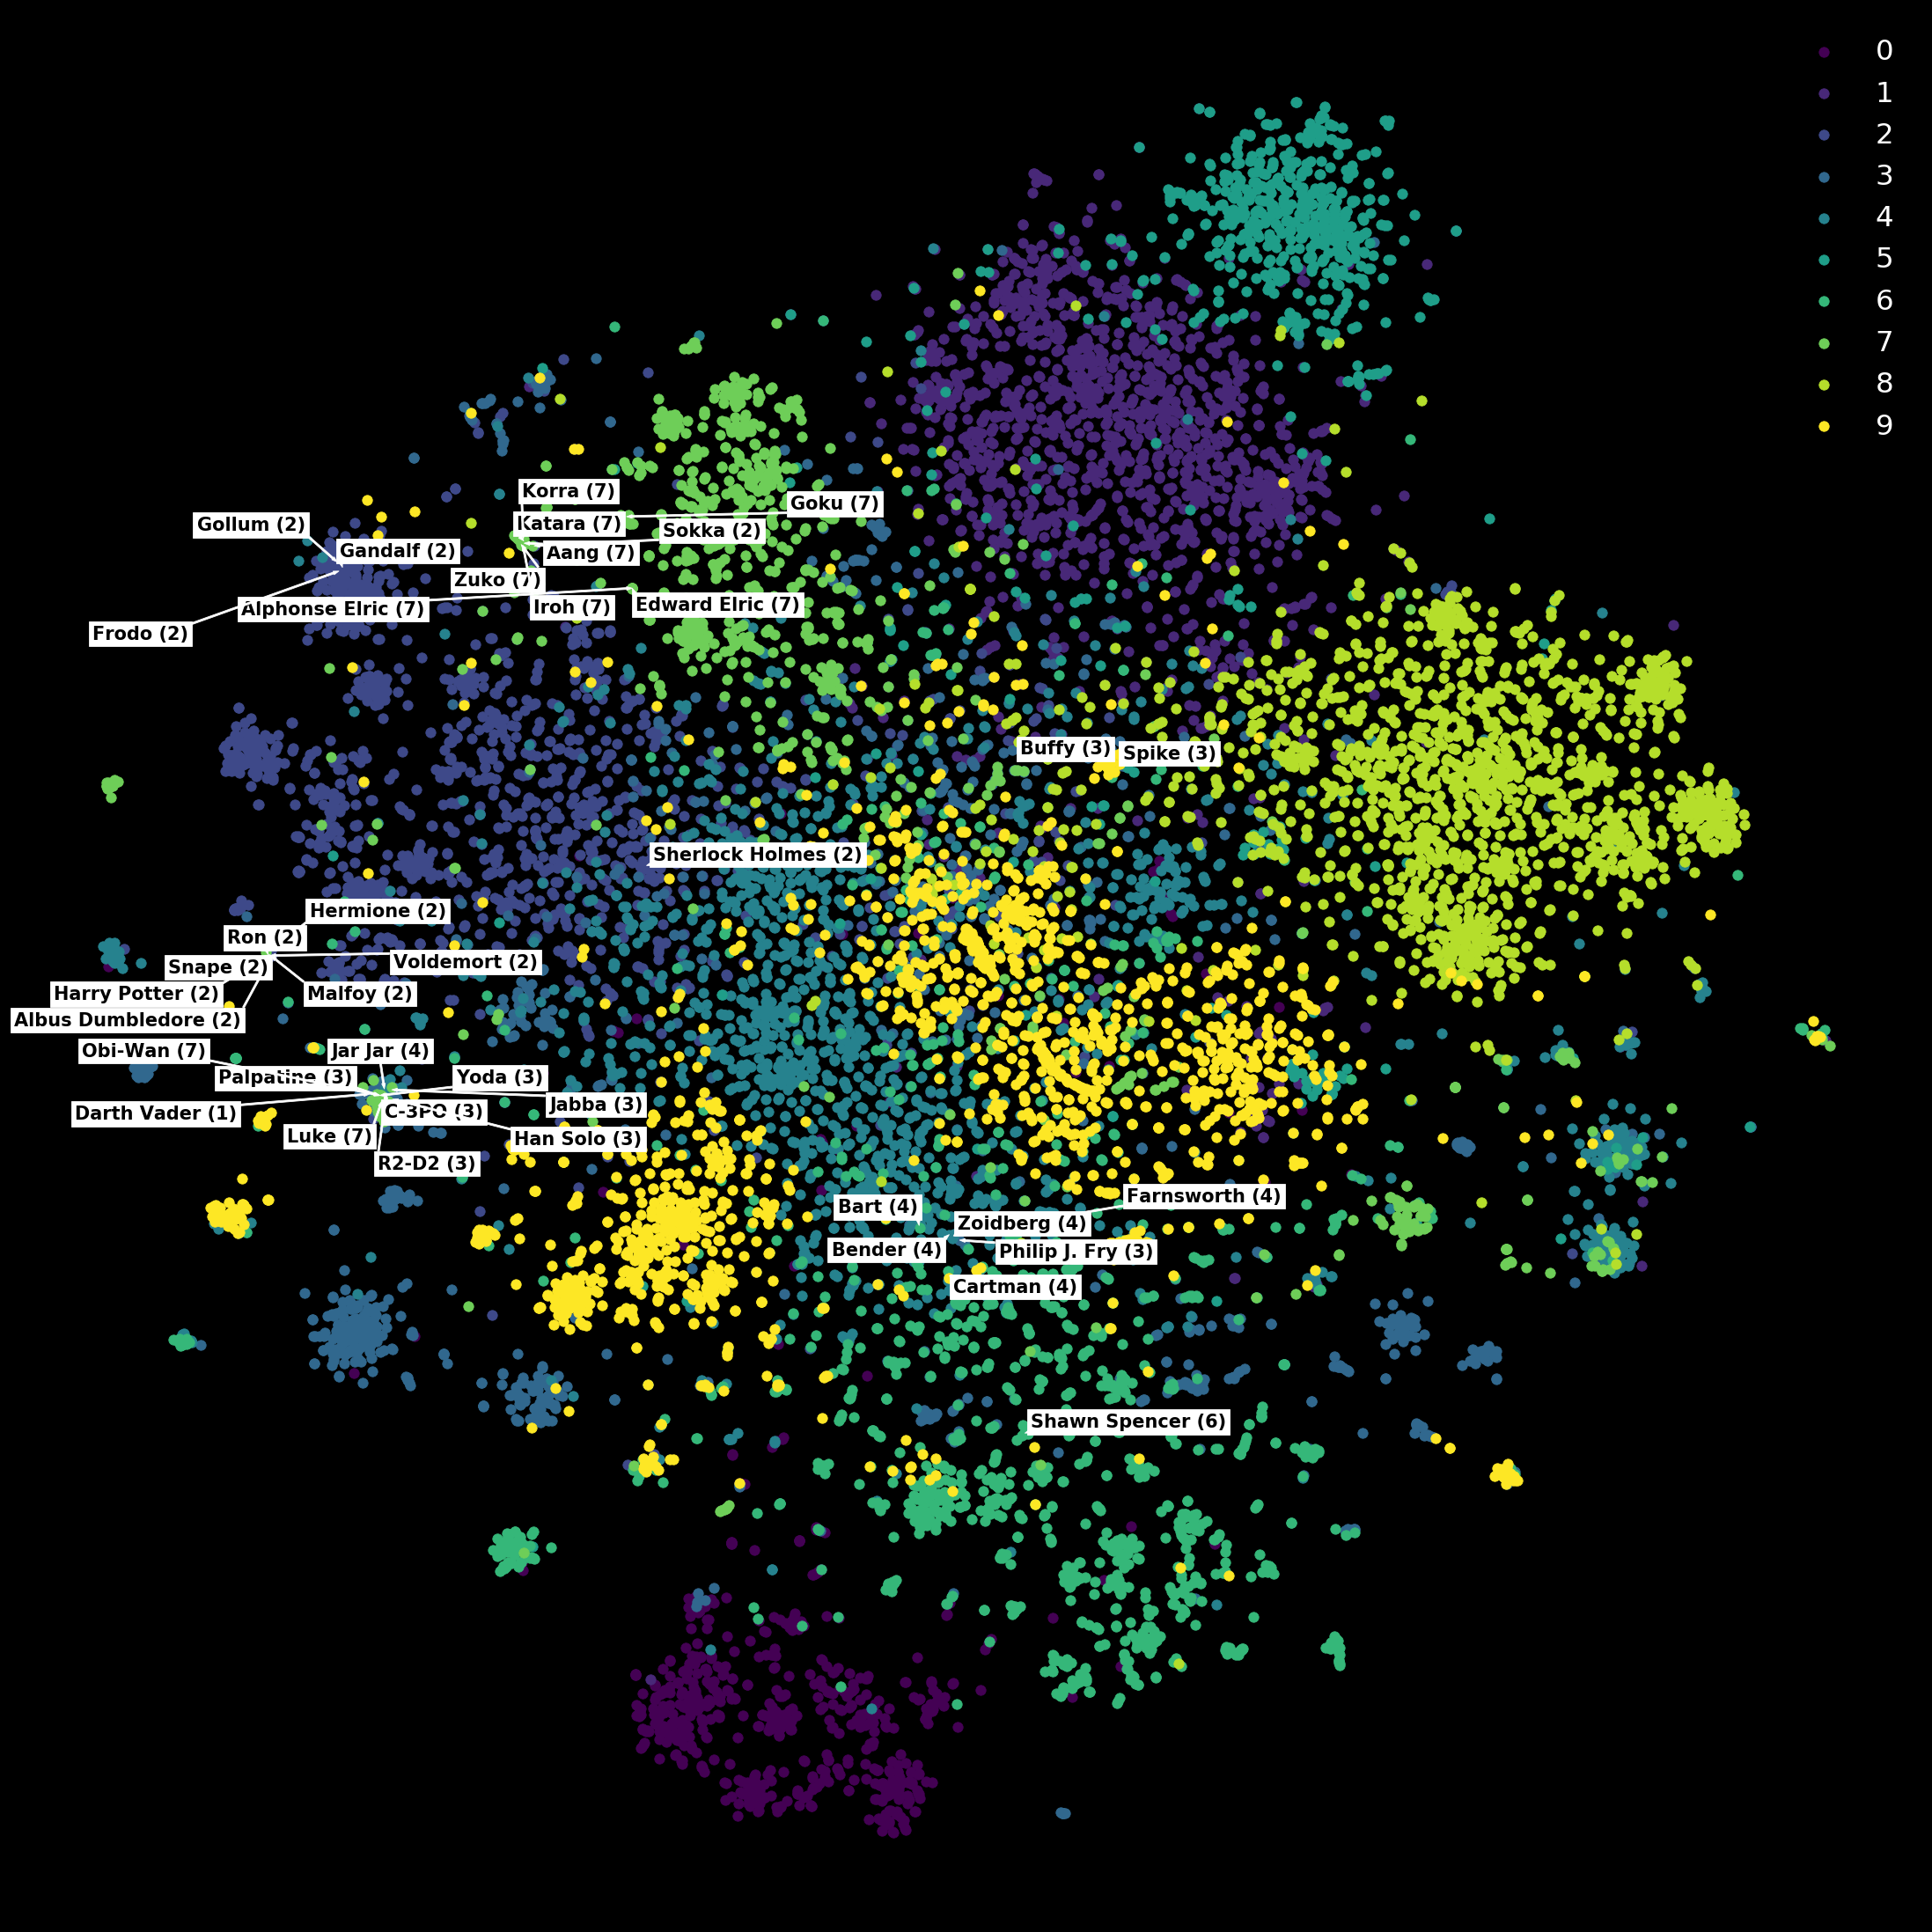

In [214]:
plt.rcParams['figure.dpi'] = 150
sns.set()
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.2,)

def plot_clustering(points_2d, cluster_labels, point_labels=None):
    tsne = TSNE(n_iter=250)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    cmap = matplotlib.cm.get_cmap('viridis')
    num_clusters = len(np.unique(cluster_labels))
    ax.set_prop_cycle(cycler('color', [cmap(i) for i in np.linspace(0, 1, num_clusters)]))

    for label in np.unique(cluster_labels):
        points = points_2d[cluster_labels == label]
        plt.scatter(points[:, 0], points[:, 1], label=label, s=30)
        
    plt.legend()
#     texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
#     adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    texts = []
    if point_labels is not None:
        for label, point_index in point_labels:
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=5)
            arrow_style =dict(facecolor='white', shrink=0)
#             text = ax.annotate(
#                 label, 
#                 xy=point, 
#                 fontsize=10, 
#                 verticalalignment='bottom', 
#                 horizontalalignment='center', 
#                 color='black', 
#                 weight='bold', 
#                 bbox=box_style, 
#                 xytext=(0, 30), 
#                 textcoords='offset pixels',
#                 arrowprops=arrow_style
#             )
#             texts.append(text)
        for label, point_index in point_labels:
            cluster_label = cluster_labels[point_index]
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=2, alpha=1)
            arrow_style =dict(facecolor=('white'), width=1, headwidth=2, headlength=3)
#             label = label.split(' ')[0]
            label += f' ({cluster_label})'
#             arrow_style =dict(facecolor=('gray'), arrowstyle='-')
            text = plt.text(
                point[0],
                point[1],
                label, 
                fontsize=10, 
                verticalalignment='bottom', 
                horizontalalignment='center', 
                color='black', 
                weight='bold', 
                bbox=box_style
                
            )
            texts.append(text)
    adjust_text(texts, arrowprops=arrow_style)
    plt.tight_layout()
    
plot_clustering(points_2d, cluster_labels, point_labels)

In [224]:
model.docvecs.most_similar('Bender (Futurama)')

[('Zoidberg', 0.7327503561973572),
 ('Hermes Conrad', 0.7140606045722961),
 ('Otto Mann', 0.6593813300132751),
 ('Swedish Chef', 0.6564186215400696),
 ('Doctor Neo Cortex', 0.6503866314888),
 ('Herr Otto Flick', 0.6487035751342773),
 ('Cop-Tur', 0.6461981534957886),
 ('Noid', 0.6461681127548218),
 ('Planet Express Ship', 0.64450603723526),
 ('B. A. Baracus', 0.6374863982200623)]

In [60]:
from gensim.models import doc2vec

In [62]:
ls

category_notes.md  images/                main.py     sandbox.py
documents/         logs/                  notebooks/  setup.py
hwmf/              long_run_on_raw.model  README.md


In [63]:
laoded_model = doc2vec.Doc2Vec.load('hwmf/data/first_that_doesnt_suck.model')